# Linear Regression Python - Predicting the price of Diamonds with Carats 

# Directory, Libraries and data

In [1]:
# Directory
%cd C:/Users/shrav/Data_Analysis_Projects/Datasets/Linear Regression

C:\Users\shrav\Data_Analysis_Projects\Datasets\Linear Regression


In [2]:
# Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
# Load data 
fields = ['carat', 'price']
df = pd.read_csv("diamond.csv", skipinitialspace=True, usecols=fields)
df.head()

,carat,price
0,0.30,1302
1,0.30,1510
2,0.30,1510
3,0.30,1260
4,0.31,1641


**$H_0$: There is no effect of carats on the diamond price**

# Searching Outliers

In [4]:
desc = df.describe().round(2)
desc

,carat,price
count,308.00,308.00
mean,0.63,5019.48
std,0.28,3403.12
min,0.18,638.00
25%,0.35,1625.00
50%,0.62,4215.00
75%,0.85,7446.00
max,1.10,16008.00


In [5]:
# Getting the IQR for the price

q1, q3 = desc.iloc[4, 1], desc.iloc[6, 1]
iqr = 1.5 * (q3 - q1)
lw, hi = q1 - iqr, q3 + iqr

lw, hi

(-7106.5, 16177.5)

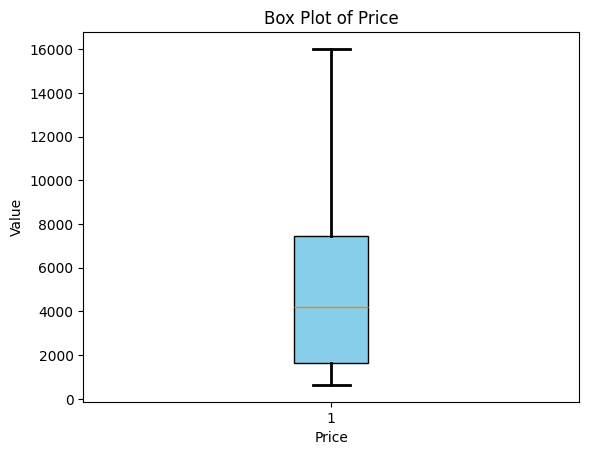

In [6]:
plt.boxplot(df['price'].dropna(), patch_artist=True, 
            boxprops=dict(facecolor='skyblue', color='black'),
            whiskerprops=dict(color='black', linewidth=2),
            capprops=dict(color='black', linewidth=2))

plt.title('Box Plot of Price')
plt.xlabel('Price')
plt.ylabel('Value')
plt.show()

There are no outliers in this data 

# Checking for Correlation

          carat     price
carat  1.000000  0.944727
price  0.944727  1.000000 



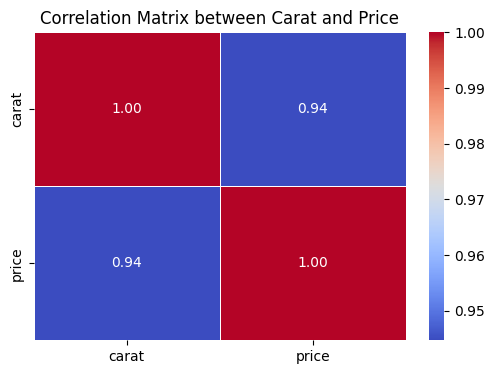

In [7]:
# Create the correlation matrix
correlation_matrix = df[['carat', 'price']].corr()
print(correlation_matrix, "\n")

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm',
            fmt='.2f', 
            cbar=True, 
            linewidths=0.5)
plt.title('Correlation Matrix between Carat and Price')
plt.show()

High correlation between carat and price

# Data Preparation 

In [8]:
# Isolate x and y

X = df["carat"]
y = df["price"]

In [9]:
# Adding a constant to independent variable 
X = sm.add_constant(X)
X.head()

,const,carat
0,1.0,0.30
1,1.0,0.30
2,1.0,0.30
3,1.0,0.30
4,1.0,0.31


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Linear Regression Model

In [11]:
model_sm = sm.OLS(endog=y_train, exog=X_train).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     1954.
Date:                Mon, 28 Apr 2025   Prob (F-statistic):          1.88e-118
Time:                        00:17:53   Log-Likelihood:                -2083.2
No. Observations:                 246   AIC:                             4170.
Df Residuals:                     244   BIC:                             4177.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2237.0186    183.865    -12.167      0.0

In [12]:
sm_pred = model_sm.predict(X_test)
sm_pred[:4]

63     5392.952109
247    5161.740874
293    9439.148717
124    9323.543100
dtype: float64

- As the p-value is less than 0.05 we can reject the null hypothesis
- Every 1 increase in carat we observe an increase of 11600 in diamond price

# Visualizing the training set results

In [18]:
# creating a function to generate scatter plot and best fit line
import numpy as np
import matplotlib.pyplot as plt

def regression_plot(x, y, x_label, y_label, title, 
                    color="default", labels="Dataset",
                    scatter_plots=1, grid=True, legend=True):
    """
    Creates scatter plots with linear regression lines for multiple datasets.

    Parameters:
    x (list of arrays): A list of arrays for the independent variable data (multiple datasets).
    y (list of arrays): A list of arrays for the dependent variable data (multiple datasets).
    x_label (str): Label for the x-axis.
    y_label (str): Label for the y-axis.
    title (str): Title of the plot.
    scatter_plots (int, optional): The number of scatter plots to plot (default is 1).
    grid (bool, optional): Whether to display grid lines. Default is True.
    legend (bool, optional): Whether to display a legend. Default is True.
    color (str or list of str, optional): The color for scatter plot points. If 'default', default colors will be used.
    """
    # Create a figure for plotting
    plt.figure(figsize=(8, 6))

    # Handle color argument
    if color == "default":
        color = ['blue'] * scatter_plots  # Default color for all scatter plots
    elif isinstance(color, str):  # Single color for all plots
        color = [color] * scatter_plots
    elif isinstance(color, list):  # Multiple colors for multiple datasets
        assert len(color) == scatter_plots, "Length of color list must match number of scatter plots"

    if labels == "Dataset":
        labels = [f'Dataset {i + 1}' for i in range(scatter_plots)]  
    elif isinstance(labels, list): 
        assert len(labels) == scatter_plots, "Length of color list must match number of scatter plots"

    # Iterate through each dataset (x, y)
    for i in range(scatter_plots):
        # Scatter plot for each dataset with assigned color
        plt.scatter(x[i], y[i], label=labels[i], c=color[i])

        # Fit a linear regression line for each dataset
        b, a = np.polyfit(x[i], y[i], 1)  # Linear fit (slope and intercept)
        plt.plot(x[i], b * x[i] + a, label=f'Linear Fit {i+1}: y = {b:.2f}x + {a:.2f}', c=color[i])

    # Adding labels and title
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.title(title, fontsize=14)

    # Add gridlines if requested
    if grid:
        plt.grid(True)

    # Add a legend if requested
    if legend:
        plt.legend()

    # Adjust layout to ensure no elements are cut off
    plt.tight_layout()

    # Display the plot
    plt.show()


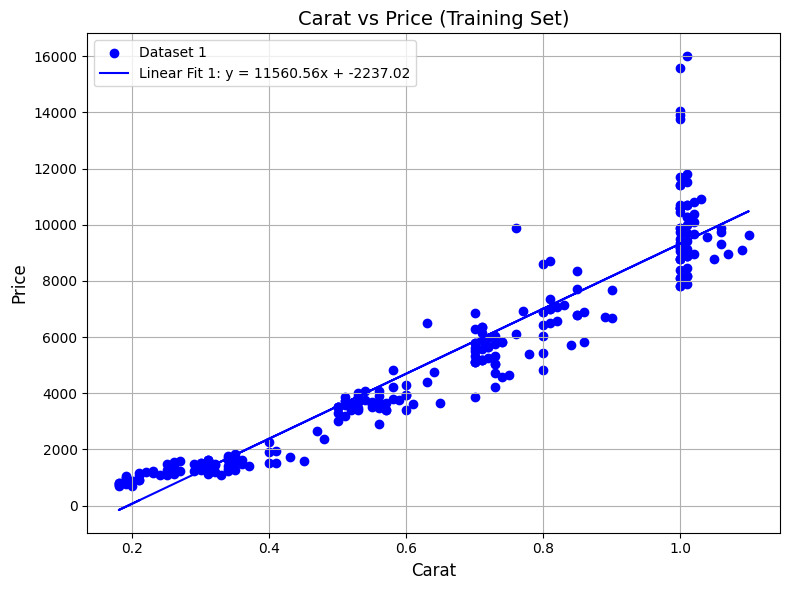

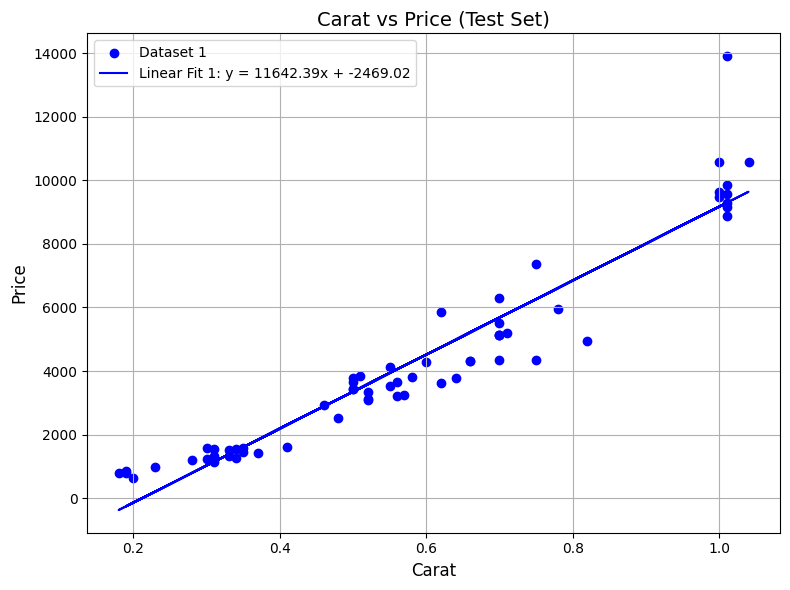

In [14]:
# First Plot - Training Set
regression_plot([X_train['carat']], [y_train], 
                'Carat', 'Price', 
                'Carat vs Price (Training Set)', 
                grid=True, legend=True)

# Second Plot - Test Set
regression_plot([X_test['carat']], [y_test], 
                'Carat', 'Price', 
                'Carat vs Price (Test Set)', 
                grid=True, legend=True)


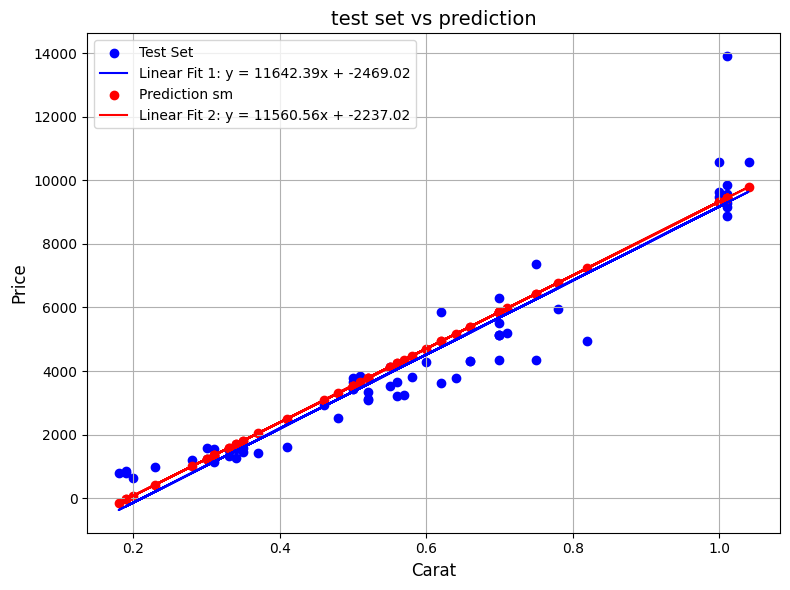

In [19]:
# Test set vs prediction 
regression_plot([X_test['carat'], X_test['carat']], [y_test, sm_pred], 
                'Carat', 'Price', 'test set vs prediction', 
                color=('blue', 'red'),
                labels=("Test Set", "Prediction sm"),
                scatter_plots=2,
                grid=True, legend=True)

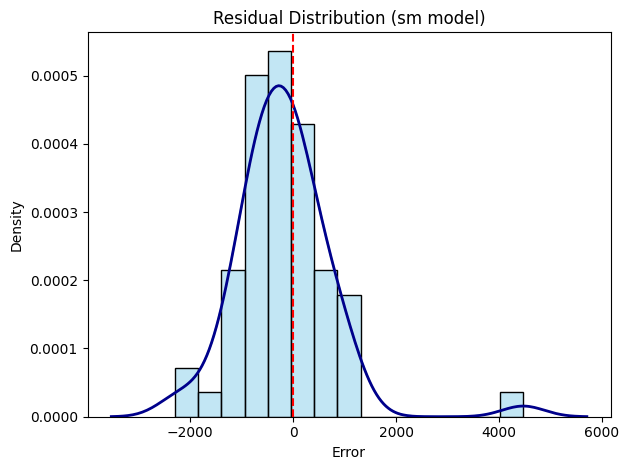

In [20]:
# Residual plot

# Calculate residuals
residuals_sm = y_test - sm_pred

# Histogram with more contrast
sns.histplot(residuals_sm, color='skyblue', edgecolor='black', kde=True, stat='density', linewidth=1)

# Adjust the KDE line's appearance
sns.kdeplot(residuals_sm, color='darkblue', linewidth=2)

# Add a vertical line at x=0 (for reference)
plt.axvline(x=0, color='red', linestyle='--')

# Titles and labels
plt.title('Residual Distribution (sm model)')
plt.xlabel("Error")
plt.ylabel('Density')

# Final layout
plt.tight_layout()
plt.show()


In [21]:
# Important metrics 
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, sm_pred))
print('MSE:', metrics.mean_squared_error(y_test, sm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, sm_pred)))

MAE: 666.7119591381418
MSE: 904080.9565934251
RMSE: 950.8317183358079
